In [2]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [3]:
file_era5 = '/home/dgray24/ea_moda_fc_mtpr.nc'
ds = xr.open_dataset(file_era5)
ds

<xarray.Dataset>
Dimensions:    (longitude: 1280, latitude: 523, time: 504)
Coordinates:
  * longitude  (longitude) float32 -168.8 -168.5 -168.2 ... 190.4 190.7 191.0
  * latitude   (latitude) float32 87.26 86.98 86.7 ... -58.88 -59.16 -59.44
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Data variables:
    mtpr       (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [4]:
SlicedData = ds.sel(latitude=slice(40,36),
                longitude=slice(-84,-74))

ds_era5 = SlicedData.sel(time=slice('1980-01-01','2009-12-31'))
ds_era5

<xarray.Dataset>
Dimensions:    (longitude: 35, latitude: 14, time: 360)
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2009-12-01
Data variables:
    mtpr       (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [5]:
ds_era5 = ds_era5 * 86400
ds_era5

<xarray.Dataset>
Dimensions:    (longitude: 35, latitude: 14, time: 360)
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2009-12-01
Data variables:
    mtpr       (time, latitude, longitude) float64 1.502 1.502 ... 5.786 6.254
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [6]:
ds_era5_yr = ds_era5.groupby('time.year').mean()
ds_era5_yr

<xarray.Dataset>
Dimensions:    (longitude: 35, latitude: 14, year: 30)
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * year       (year) int64 1980 1981 1982 1983 1984 ... 2006 2007 2008 2009
Data variables:
    mtpr       (year, latitude, longitude) float64 3.278 3.278 ... 4.202 4.887

/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


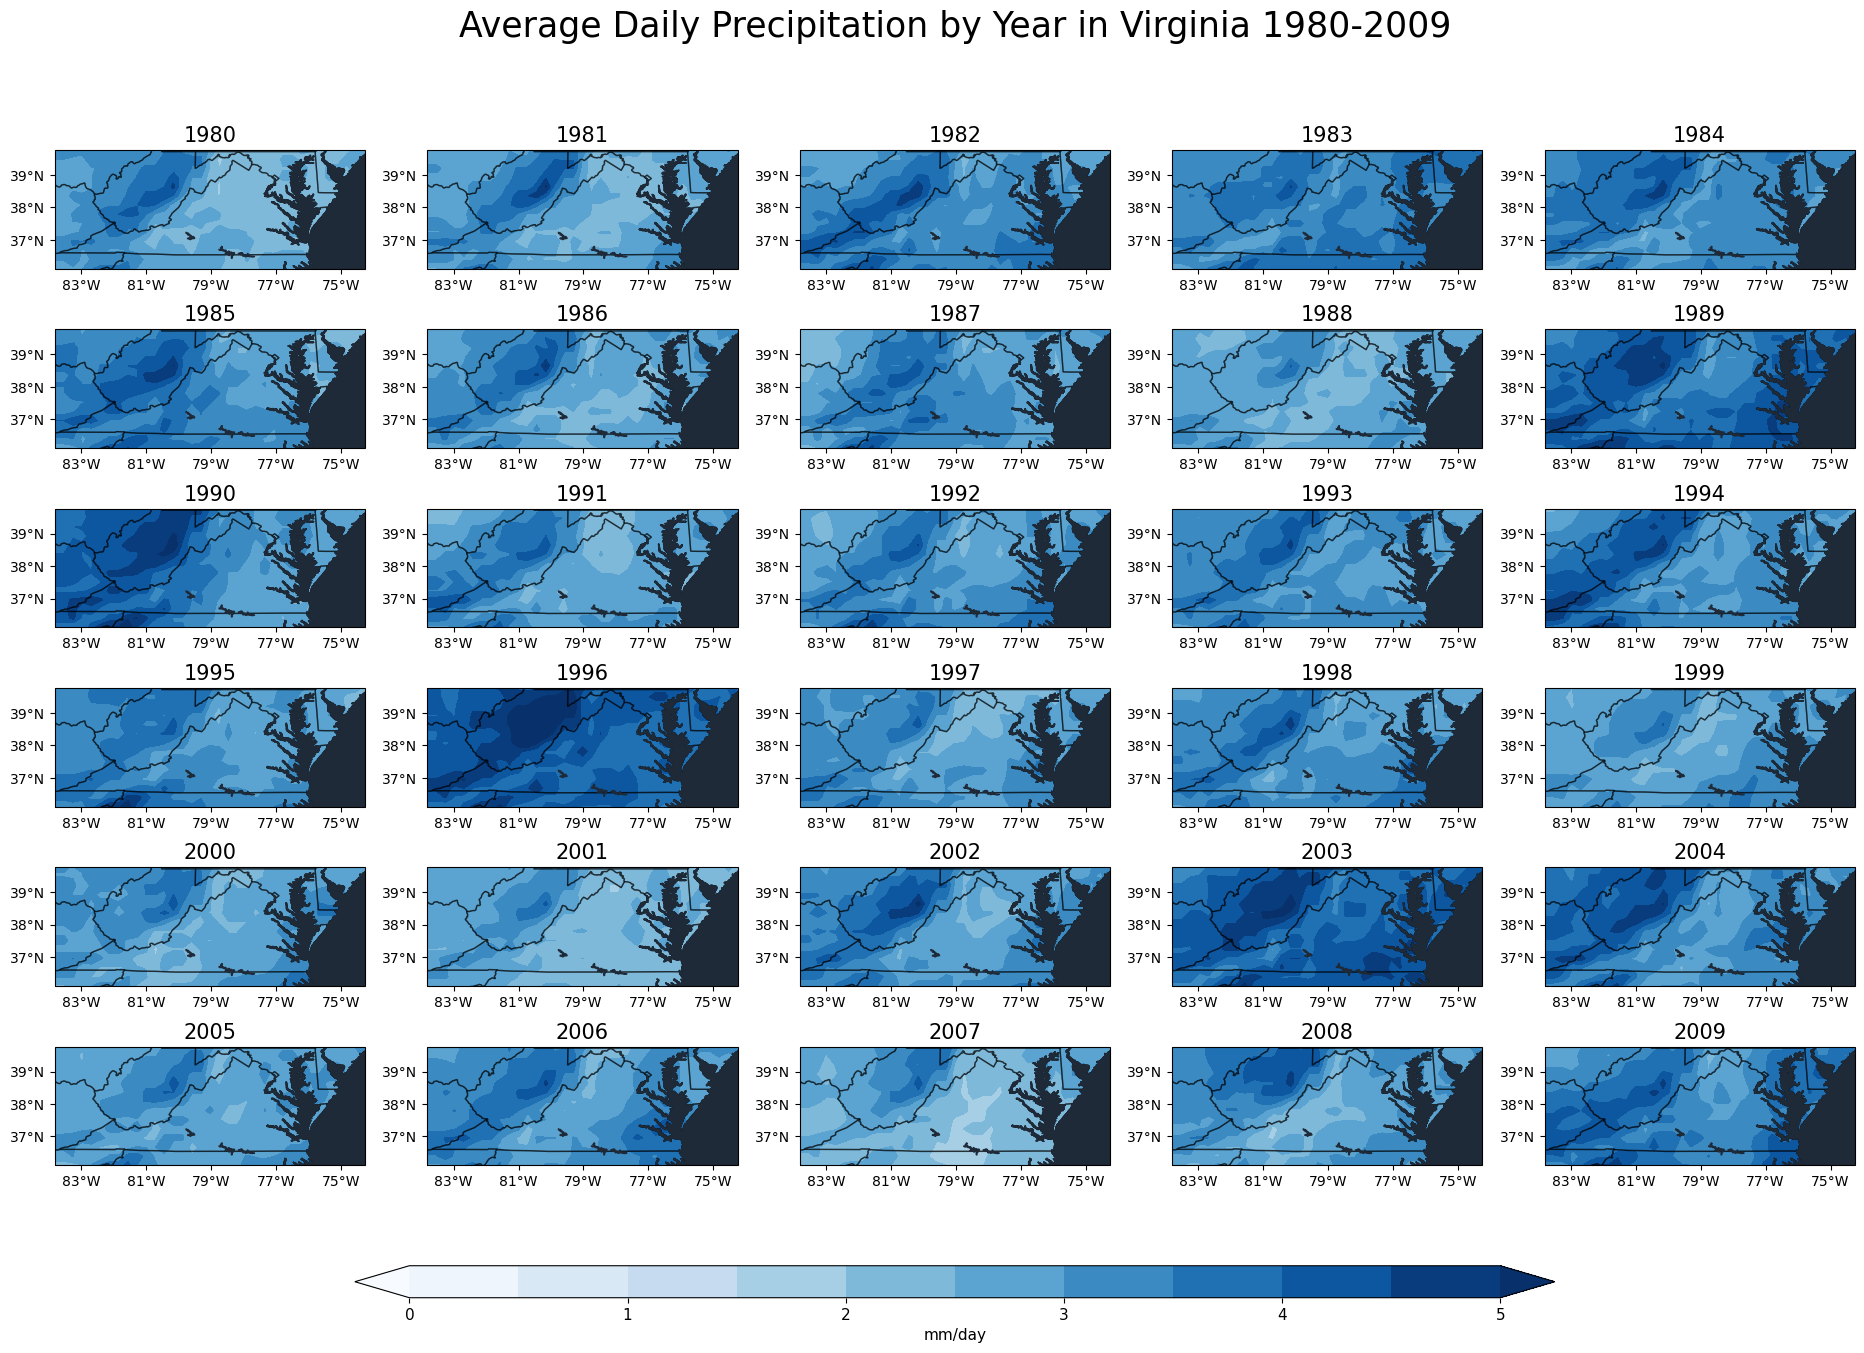

In [7]:
fig, axs = plt.subplots(nrows=6,ncols=5,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=-78)},
                        figsize=(20,16))

axs=axs.flatten()

for i,mtpr in enumerate(ds_era5_yr['year']):

        data=ds_era5_yr['mtpr'].sel(year=mtpr)

        #data,lons=ds_era5_yr['longitude']

        cs=axs[i].contourf(ds_era5_yr['longitude'],ds_era5_yr['latitude'],data, levels=[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0],
                          transform = ccrs.PlateCarree(),
                          cmap='Blues',extend='both')

        axs[i].set_xticks([-83,-81,-79,-77,-75], crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)
        
        axs[i].set_yticks([37,38,39], crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        axs[0].set_title('1980',fontsize=15)
        axs[1].set_title('1981',fontsize=15)
        axs[2].set_title('1982',fontsize=15)
        axs[3].set_title('1983',fontsize=15)
        axs[4].set_title('1984',fontsize=15)
        axs[5].set_title('1985',fontsize=15)
        axs[6].set_title('1986',fontsize=15)
        axs[7].set_title('1987',fontsize=15)
        axs[8].set_title('1988',fontsize=15)
        axs[9].set_title('1989',fontsize=15)
        axs[10].set_title('1990',fontsize=15)
        axs[11].set_title('1991',fontsize=15)
        axs[12].set_title('1992',fontsize=15)
        axs[13].set_title('1993',fontsize=15)
        axs[14].set_title('1994',fontsize=15)
        axs[15].set_title('1995',fontsize=15)
        axs[16].set_title('1996',fontsize=15)
        axs[17].set_title('1997',fontsize=15)
        axs[18].set_title('1998',fontsize=15)
        axs[19].set_title('1999',fontsize=15)
        axs[20].set_title('2000',fontsize=15)
        axs[21].set_title('2001',fontsize=15)
        axs[22].set_title('2002',fontsize=15)
        axs[23].set_title('2003',fontsize=15)
        axs[24].set_title('2004',fontsize=15)
        axs[25].set_title('2005',fontsize=15)
        axs[26].set_title('2006',fontsize=15)
        axs[27].set_title('2007',fontsize=15)
        axs[28].set_title('2008',fontsize=15)
        axs[29].set_title('2009',fontsize=15)
        
        axs[i].coastlines()
        
        axs[i].add_feature(feature.OCEAN, zorder=2, color='#1F2A38')
        axs[i].add_feature(feature.BORDERS, zorder=2, color='k')
        axs[i].add_feature(feature.LAKES, zorder=3, color='#1F2A38')
        axs[i].add_feature(feature.STATES.with_scale('10m'),
               linestyle='-', alpha=.5)
        
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95, wspace=0.2, hspace=0.25)

cbar_ax = fig.add_axes([0.2, 0.175, 0.6, 0.02])

cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')
cbar.ax.tick_params(labelsize=11)
cbar.set_label(label='mm/day', size='11')

plt.suptitle('Average Daily Precipitation by Year in Virginia 1980-2009',fontsize=25)

fig.savefig('era5_groupby.png', bbox_inches='tight')